# Exercícios de Machine Learning
## Academia QADS

### Disponibilizado pelo professor Nasser Boan 
___
<br><br>
Murilo Garcia  
**E-mail:** murilogmamaral@gmail.com  
**Linkedin:** https://www.linkedin.com/in/murilogmamaral/

___
## Contexto
Cardiopatia é um termo genérico utilizado pelos médicos para designar doenças e condições médicas capazes de afetar o coração e o sistema vascular de pacientes em qualquer idade. Entre os principais tipos de cardiopatia, podemos incluir hipertensão (pressão alta), doença arterial coronariana, arritmia cardíaca e também condições mais graves como parada cardíaca ou mesmo derrame cerebral.

A cardiopatia pode ser congênita, quando o paciente a apresenta desde o nascimento ou mesmo nas primeiras semanas de vida, ou pode ser adquirida, resultando de outras condições médicas ou mesmo surgindo em decorrência do estilo de vida do paciente.

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro em cada 5 mortes por DCV são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorrem prematuramente em pessoas com menos de 70 anos de idade.


![](https://eaidr.com.br/wp-content/uploads/2020/04/cardiopatia.jpg)


## Problema

A seguradora de saúde AVIL tem perdido muitos pacientes e recursos devido a cardiopatias graves dos assegurados. Pensando em uma situação de melhor planejamento financeiro (ter a quantia correta de dinheiro em reserva para os segurados acometidos por cadiopatias) a AVIL coletou dados de um pequena amostra representativa de seus segurados. Finalmente, contratou um cientista de dados (<b>você!!</b>) para criar um modelo que preveja a probabilidade de um paciente ter cardiopatia (coluna HeartDisease) e assim se planejar melhor (ou seja, ela gostaria de minimizar as situações onde um segurado tem cardiopatia e o gasto não foi planejado).


## Dados

Os dados que foram disponibilizados estão no arquivo <code>heart.csv</code>. Possuindo 12 colunas :

1. Age: idade do paciente [anos]
2. Sex: sexo do paciente [M: Masculino, F: Feminino]
3. ChestPainType: tipo de dor torácica [TA: angina típica, ATA: angina atípica, NAP: dor não anginosa, ASY: assintomática]
4. RestingBP: pressão arterial em repouso [mm Hg]
5. Cholesterol: colesterol sérico [mm / dl]
6. FastingBS: açúcar no sangue em jejum [1: se SB em jejum> 120 mg / dl, 0: caso contrário]
7. RestingECG: resultados de eletrocardiograma em repouso [Normal: Normal, ST: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão de ST> 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]
8. MaxHR: freqüência cardíaca máxima alcançada [valor numérico entre 60 e 202]
9. ExerciseAngina: angina induzida por exercício [S: Sim, N: Não]
10. Oldpeak: oldpeak = ST [valor numérico medido na depressão]
11. ST_lope: a inclinação do segmento ST de pico do exercício [Up: uploping, Flat: flat, Down: downsloping]
12. HeartDisease: classe [1: doença cardíaca, 0: Normal]


## Dicas

* Vá pelo mais simples primeiros (execute teste com uma quantidade menor de features)
* Defina bem a métrica que está procurando
* Utilize um modelo como baseline (DummyClassifier)
* Compare vários modelos
* Descreva seus resultados (importância das features e outras formatos de explicabilidade de modelos)  


___
### Bibliotecas

In [1]:
# Básico para Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline / Transformação
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression

# Avaliação de performance dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

# Otimização
from sklearn.model_selection import GridSearchCV

# Faz com que o pandas exiba até 200 linhas
pd.set_option('display.max_rows', 200)

# Faz com que todos os plots tenham o estilo do seaborn
sns.set_theme()

___
### Carregando e inspecionando a base

In [2]:
# Carregando a base
df = pd.read_csv('datasets/heart.csv')

In [3]:
# Padronizando os nomes das colunas com letras minúsculas
df.columns = [x.lower() for x in df.columns]

In [4]:
# Inspecionando
df.head(10)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [7]:
df.describe().round()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,54.0,132.0,199.0,0.0,137.0,1.0,1.0
std,9.0,19.0,109.0,0.0,25.0,1.0,0.0
min,28.0,0.0,0.0,0.0,60.0,-3.0,0.0
25%,47.0,120.0,173.0,0.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,0.0,138.0,1.0,1.0
75%,60.0,140.0,267.0,0.0,156.0,2.0,1.0
max,77.0,200.0,603.0,1.0,202.0,6.0,1.0


___
### Tratando outliers e valores nulos

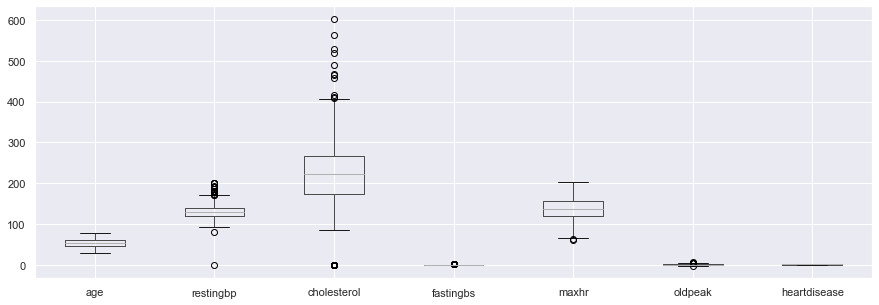

In [8]:
# Não parece haver nenhum outlier muito distoante
df.boxplot(figsize=(15,5));

In [9]:
# Observando se há zeros representando nulos
(df == 0).sum()

age                 0
sex                 0
chestpaintype       0
restingbp           1
cholesterol       172
fastingbs         704
restingecg          0
maxhr               0
exerciseangina      0
oldpeak           368
st_slope            0
heartdisease      410
dtype: int64

In [10]:
# Imputando nulos em valores iguais a zero onde é pertinente
df[['restingbp','cholesterol']] = df[['restingbp','cholesterol']].replace(0,np.nan)

In [11]:
# Nulos
df.isna().sum()

age                 0
sex                 0
chestpaintype       0
restingbp           1
cholesterol       172
fastingbs           0
restingecg          0
maxhr               0
exerciseangina      0
oldpeak             0
st_slope            0
heartdisease        0
dtype: int64

In [12]:
# Observando média do colesterol para determinados subgrupos
subgrupos = df.groupby(['chestpaintype','heartdisease'])['cholesterol']
subgrupos.mean()

chestpaintype  heartdisease
ASY            0               245.770833
               1               251.759124
ATA            0               239.434483
               1               266.619048
NAP            0               235.910569
               1               240.500000
TA             0               222.730769
               1               248.933333
Name: cholesterol, dtype: float64

In [13]:
# Utilizando essas médias para preencher os valores nulos
df.cholesterol = subgrupos.transform(lambda x: x.fillna(x.mean()))

In [14]:
# Nulos
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         1
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [15]:
# Dropando NA
df = df.dropna()

___
### Análise Exploratória

In [16]:
# Selecionando as features
cat_columns = ['sex','chestpaintype','fastingbs','restingecg','exerciseangina','st_slope'] # colunas categóricas
num_columns = ['oldpeak','age', 'restingbp', 'cholesterol','maxhr'] # colunas numéricas
target = 'heartdisease'
df_refined = df[cat_columns + num_columns + [target]]
df_refined.head()

,sex,chestpaintype,fastingbs,restingecg,exerciseangina,st_slope,oldpeak,age,restingbp,cholesterol,maxhr,heartdisease
0,M,ATA,0,Normal,N,Up,0.0,40,140.0,289.0,172,0
1,F,NAP,0,Normal,N,Flat,1.0,49,160.0,180.0,156,1
2,M,ATA,0,ST,N,Up,0.0,37,130.0,283.0,98,0
3,F,ASY,0,Normal,Y,Flat,1.5,48,138.0,214.0,108,1
4,M,NAP,0,Normal,N,Up,0.0,54,150.0,195.0,122,0


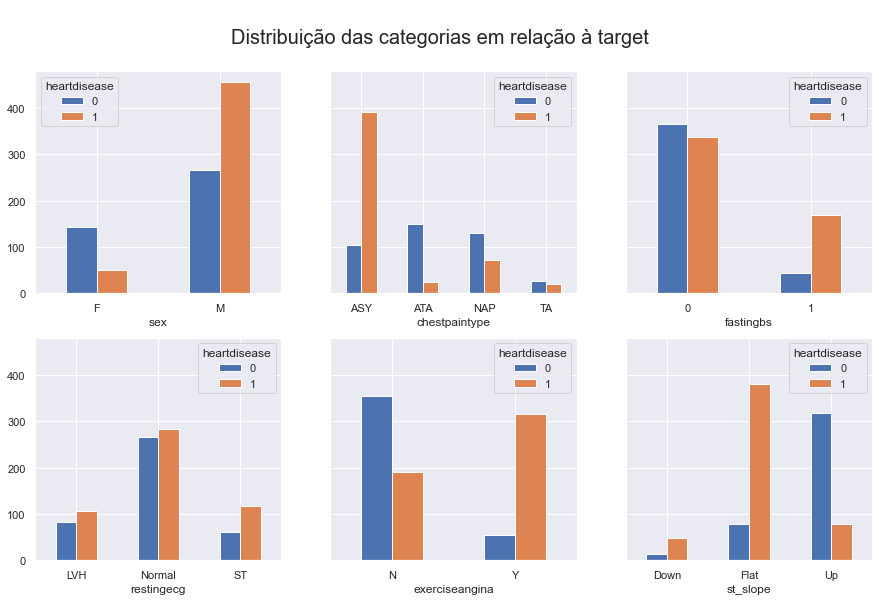

In [17]:
files = [pd.crosstab(df_refined[c],df_refined.heartdisease) for c in cat_columns]
_, axarr = plt.subplots(2,3,figsize=(15,9),sharey=True)
for data, ax in zip(files, axarr.flat): data.plot(kind='bar',ax=ax,rot=0)
plt.suptitle('\nDistribuição das categorias em relação à target',fontsize=20);

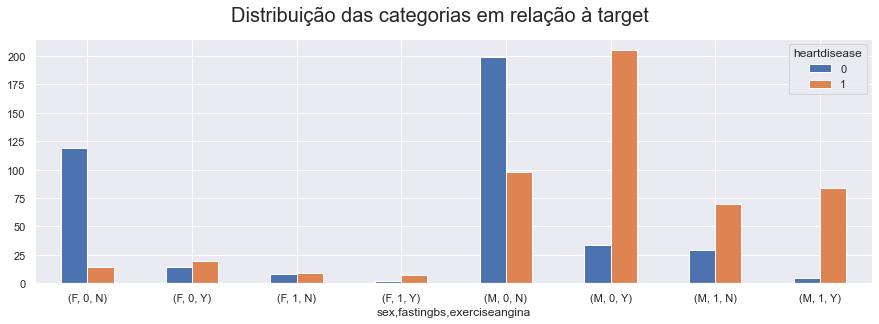

In [18]:
df_refined.pivot_table(index=['sex','fastingbs','exerciseangina'],
                       columns=target,values='age',aggfunc='count').plot(kind='bar',figsize=(15,4.5),rot=0)
plt.suptitle('Distribuição das categorias em relação à target\n',fontsize=20);

Obs.: Podemos perceber que homens (_sex_ = M) com açúcar no sangue em jejum (_fastingbs_ = 1) e dor no peito causada por exercício (_exerciseangina_ = Y) têm uma chance bastante grande de possuir cardiopatia. Mesmo quando não há açucar no sangue em jejum (_fastingbs_ = 0), se há dor no peito durante exercícios (_exerciseangina_ = Y), a chance do homem possuir cardiopatia é grande. E quando não há dor no peito durante exercícios (_exerciseangina_ = N), se há açúcar no sangue em jejum (_fastingbs_ = 1), há também uma tendência (ainda que mais leve) do homem ter cardiopatia.

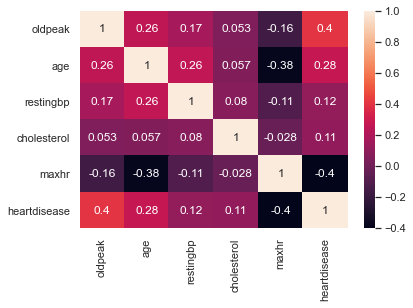

In [19]:
# Correlações
sns.heatmap(df_refined[num_columns + [target]].corr(),annot=True);

___
### Validação cruzada

In [20]:
# Modelos a serem testados
modelos = {
    'RandomForest':RandomForestClassifier(random_state=2222,criterion='entropy'),
    'DecisionTree':DecisionTreeClassifier(random_state=2222),
    'LogisticRegression':LogisticRegression(random_state=2222)
}

In [21]:
# Tratamento das variáveis
transformation = make_column_transformer(
    (MinMaxScaler(),num_columns), # Colunas numéricas
    (OneHotEncoder(handle_unknown = 'ignore'),cat_columns), # Colunas categóricas
    remainder='passthrough')

In [22]:
# Avaliando modelos
for m in modelos.keys():
    pipeline = make_pipeline(transformation,modelos[m])
    resultados = cross_validate(pipeline,
                                X = df_refined.drop(target, axis = 1),
                                y = df_refined[target],
                                cv = 10,
                                scoring='recall',
                                return_train_score=True)
    print('\n',m,'\n','-'*18,sep='')
    print('Treino       ', "%.2f" % resultados['train_score'].mean().round(2))
    print('Teste        ', "%.2f" % resultados['test_score'].mean().round(2),'\n')


RandomForest
------------------
Treino        1.00
Teste         0.87 


DecisionTree
------------------
Treino        1.00
Teste         0.80 


LogisticRegression
------------------
Treino        0.90
Teste         0.86 



___
### Escolhendo o modelo e ajustando os parâmetros

In [23]:
# Preparando a pipeline
pipeline = make_pipeline(transformation,modelos['RandomForest'])

In [24]:
# # Visualizando os parâmetros possíveis
# list(pipeline.get_params().keys())

In [25]:
# Definindo range de parâmetros a serem testados
grid = {f'randomforestclassifier__n_estimators':list(range(50,201,50)),
        f'randomforestclassifier__max_depth':list(range(2,7,2)),
        f'randomforestclassifier__min_samples_leaf':list(range(1,4,3)),
        f'columntransformer__minmaxscaler__feature_range':[(-2,2),(0,1)]}

In [26]:
# Separando as features da target
X = df_refined.drop(target,axis=1)
y = df_refined[target]

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2222)

In [27]:
# Preparando o Grid Search
gcv = GridSearchCV(pipeline,param_grid=grid,cv=10,return_train_score=True,scoring='recall');

# Fitando
gcv.fit(X_train,y_train);

In [28]:
# Observando os melhores resultados
cv_results = pd.DataFrame(gcv.cv_results_)
cond = (cv_results.mean_train_score < 0.95) & (cv_results.mean_test_score > 0.89)
cv_results[cond][['mean_train_score','mean_test_score','rank_test_score']]\
.sort_values('rank_test_score')

,mean_train_score,mean_test_score,rank_test_score
20,0.943615,0.905427,1
8,0.943891,0.905427,1
23,0.944443,0.902927,3
22,0.944720,0.902927,3
21,0.944445,0.900427,5
10,0.944720,0.900427,5
11,0.944443,0.900427,5
15,0.899666,0.900366,8
3,0.899666,0.900366,8
9,0.944445,0.897927,10


In [29]:
# Escolhendo os parâmetros
index = 8
cv_results.iloc[index,4:8]

param_columntransformer__minmaxscaler__feature_range    (-2, 2)
param_randomforestclassifier__max_depth                       6
param_randomforestclassifier__min_samples_leaf                1
param_randomforestclassifier__n_estimators                   50
Name: 8, dtype: object

In [30]:
# Treinando o modelo final
transformation = make_column_transformer(
    (MinMaxScaler(feature_range=(-2,2)),num_columns), # Colunas numéricas
    (OneHotEncoder(handle_unknown = 'ignore'),cat_columns), # Colunas categóricas
    remainder='passthrough')
rf = RandomForestClassifier(max_depth=6,min_samples_leaf=1,n_estimators=50,criterion='entropy',random_state=2222)
final_pipeline = make_pipeline(transformation,rf)
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(feature_range=(-2,
                                                                              2)),
                                                  ['oldpeak', 'age',
                                                   'restingbp', 'cholesterol',
                                                   'maxhr']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'chestpaintype',
                                                   'fastingbs', 'restingecg',
                                                   'exerciseangina',
                                                   'st_slope'])])),
              

In [31]:
# Fazendo previsões e avaliando as métricas
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        79
           1       0.91      0.91      0.91       105

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [32]:
# Observando os indivíduos que mais possuem chance de ter cardiopatias no topo da base
y_pred_proba = final_pipeline.predict_proba(X_test)
ordenando = X_test.copy()
ordenando['prob_heartdisease'] = y_pred_proba[:,1]
ordenando.sort_values('prob_heartdisease',ascending=False)

,sex,chestpaintype,fastingbs,restingecg,exerciseangina,st_slope,oldpeak,age,restingbp,cholesterol,maxhr,prob_heartdisease
210,M,ASY,1,Normal,N,Flat,0.0,48,106.0,263.000000,110,0.981684
111,M,ASY,0,Normal,Y,Flat,3.0,57,150.0,255.000000,92,0.968360
86,M,ASY,1,Normal,Y,Flat,2.0,65,170.0,263.000000,112,0.966327
405,M,ASY,1,Normal,Y,Flat,1.2,35,120.0,251.759124,130,0.965759
328,M,ASY,1,Normal,Y,Flat,0.8,52,95.0,251.759124,82,0.961565
575,M,ASY,1,Normal,Y,Flat,1.2,56,137.0,282.000000,126,0.960116
324,M,ASY,1,ST,N,Flat,-2.6,46,100.0,251.759124,133,0.958790
494,M,ASY,0,Normal,Y,Flat,2.5,60,142.0,216.000000,110,0.958694
778,M,ASY,0,LVH,Y,Flat,3.0,58,128.0,259.000000,130,0.955328
422,M,ASY,1,ST,Y,Flat,0.0,65,150.0,236.000000,105,0.955204


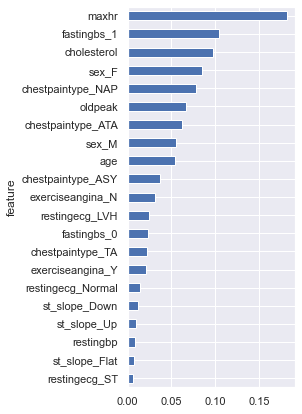

In [33]:
# Observando a importância das features
fi = {'feature':list(OneHotEncoder().fit(X_train[cat_columns]).get_feature_names(cat_columns)) + num_columns,
      'importance':list(gcv.best_estimator_.named_steps["randomforestclassifier"].feature_importances_)}
fi = pd.DataFrame(fi)
fi.sort_values('importance').set_index('feature',drop=True)['importance'].plot(kind='barh',figsize=(3,7));

# Resultados
___
* Com este modelo de classificação, a empresa pode prever novos casos de pessoas com cardiopatias e reservar recursos para gastos com atendimentos de emergência, internações e cirurgias.
* A empresa pode também atuar de maneira a previnir óbitos e gastos exorbitantes com internações graves, sugerindo aos pacientes com alta probabildade de ter cardiopatias que façam exames rotineiros e que tenham cuidados mais atentos com a saúde.
* A métrica utilizada foi a _recall_, tendo em vista que, para a regra de negócio, importa encontrar muitos casos de pessoas que realmente têm cardiopatias, mais do que simplesmente acertar os palpites.
* De todo modo, assim como a _recall_ (0.91), a _precision_ do modelo também é boa (0.91).